# Insurance Cost Prediction

Attribute Information:
●	age: age of primary beneficiary
●	sex: beneficiary’s gender - female or male
●	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight          (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
●	children: Number of children covered by health insurance / Number of dependents
●	smoker: Smoking or non-smoking
●	region: the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.
●	charges: Individual medical costs billed by health insurance (to be predicted)

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
df=pd.read_csv('INSURANCE.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# BASIC CHECKS

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.duplicated().sum()

1

In [10]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe(include='O')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# EDA

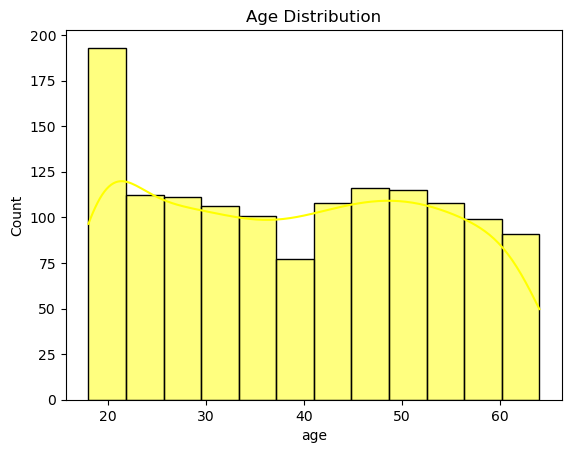

In [15]:
sns.histplot(df.age,color='yellow',kde=True)
plt.title('Age Distribution')
plt.show()

Majority of the age group is of age 20

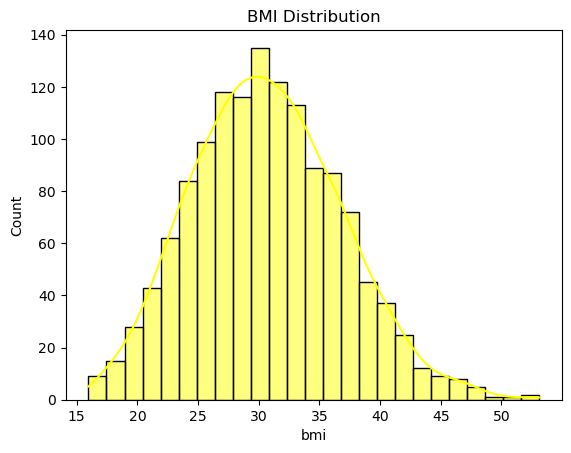

In [17]:
sns.histplot(df.bmi,color='yellow',kde=True)
plt.title('BMI Distribution')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and this could be a major factor in increasing the medical cost.

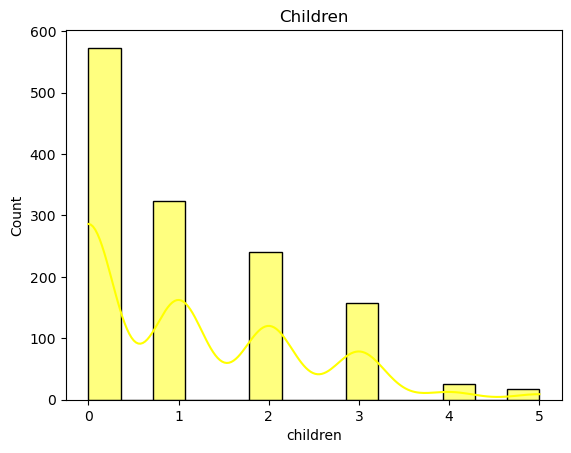

In [19]:
sns.histplot(df.children,color='yellow',kde=True)
plt.title('Children')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

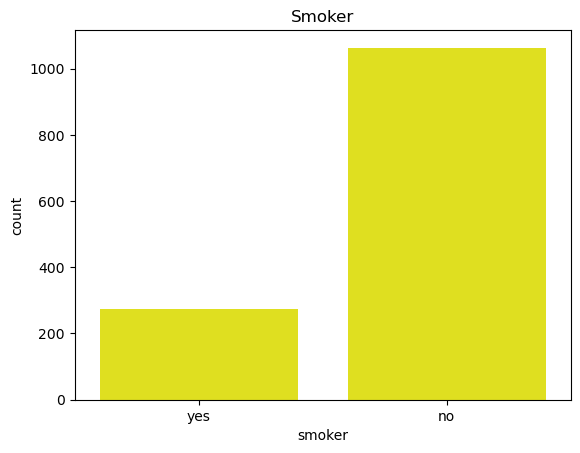

In [21]:
sns.countplot(x='smoker',color='yellow',data=df)
plt.title('Smoker')
plt.show()

Majority of the patients are not smokers

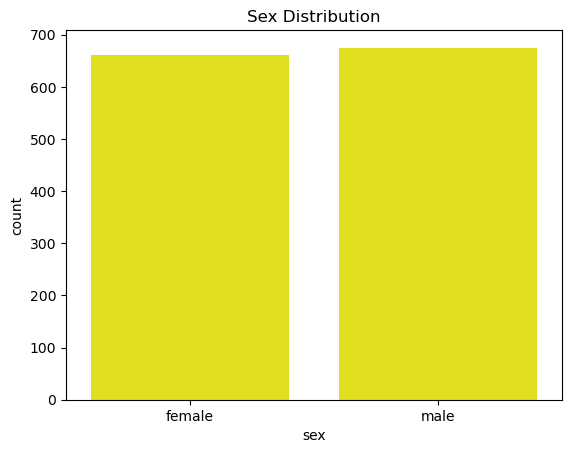

In [23]:
sns.countplot(x='sex',color='yellow',data=df)
plt.title('Sex Distribution')
plt.show()

Male and Female patients are almost same in count.

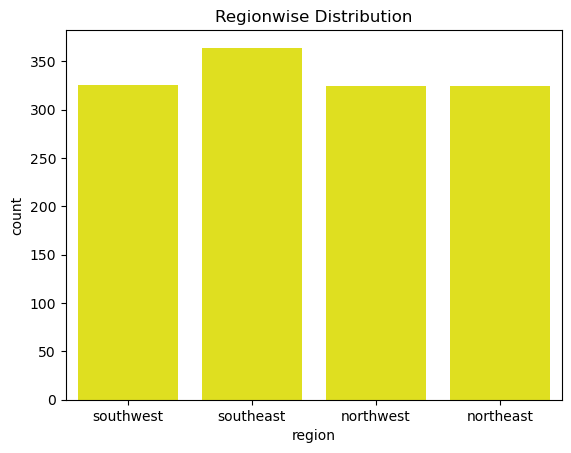

In [25]:
sns.countplot(x='region',color='yellow',data=df)
plt.title('Regionwise Distribution')
plt.show()

The count of patient from southeast is slighltly higher than the other regions, but the number of patients from other regions are almost equal.

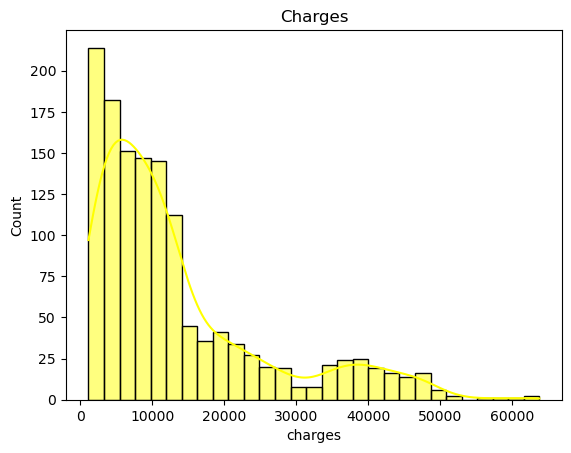

In [27]:
sns.histplot(df.charges,color='yellow',kde=True)
plt.title('Charges')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

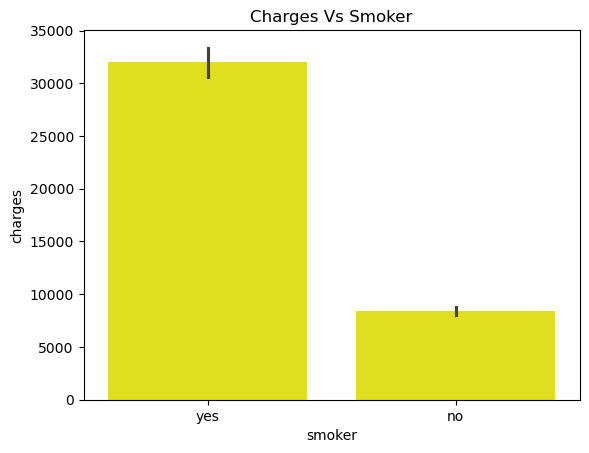

In [29]:
sns.barplot(data=df,x='smoker',y='charges',color='yellow')
plt.title('Charges Vs Smoker')
plt.show()

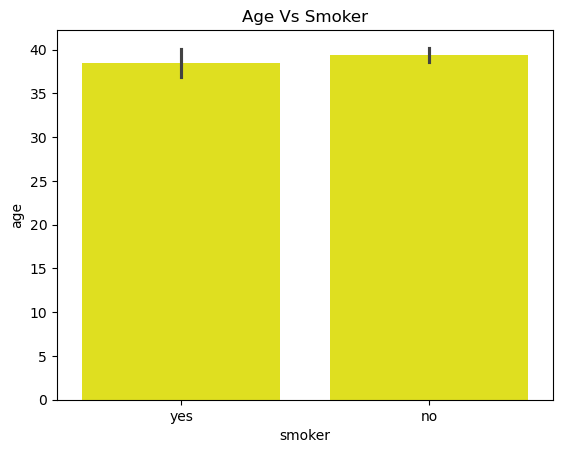

In [30]:
sns.barplot(data=df,x='smoker',y='age',color='yellow')
plt.title('Age Vs Smoker')
plt.show()

# Encoding

In [32]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [33]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [34]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [35]:
#sex
df.replace({"sex": {"male": 1, "female": 0}}, inplace = True)

# smoker
df.replace({"smoker": {"yes": 1, "no": 0}}, inplace = True)

#region
df.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace = True)

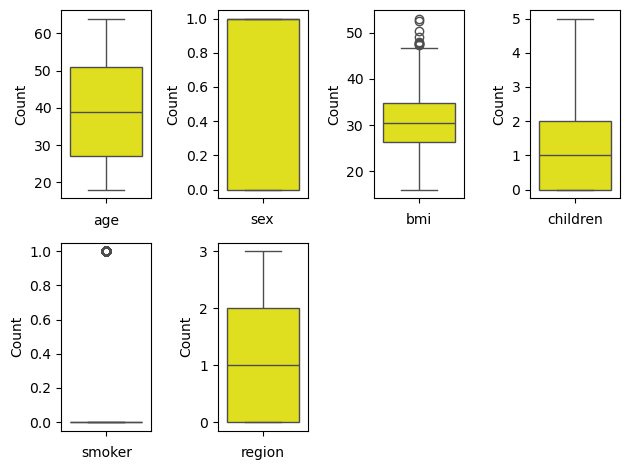

In [36]:
#Boxplot
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column],color='yellow')
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber+=1
plt.tight_layout()

From above boxplot we can infer that bmi must be treated with outliers.

In [38]:
#Removing Outliers using IQR

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df.loc[(df['bmi'] <= lower_bound),'bmi'] = lower_bound
df.loc[(df['bmi'] >= upper_bound),'bmi'] = upper_bound

## CORRELATION

In [40]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.111998,0.041536,-0.025587,0.006691,0.298308
sex,-0.019814,1.000000,0.044831,0.017848,0.076596,-0.017150,0.058044
bmi,0.111998,0.044831,1.000000,0.013692,0.003151,-0.261154,0.199063
children,0.041536,0.017848,0.013692,1.000000,0.007331,0.020206,0.067389
smoker,-0.025587,0.076596,0.003151,0.007331,1.000000,-0.053454,0.787234
region,0.006691,-0.017150,-0.261154,0.020206,-0.053454,1.000000,-0.056070
charges,0.298308,0.058044,0.199063,0.067389,0.787234,-0.056070,1.000000


<Axes: >

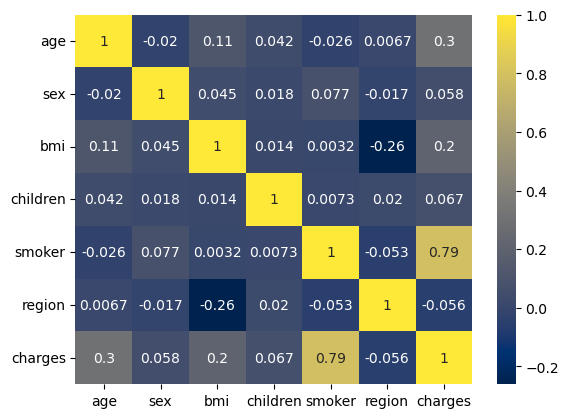

In [41]:
sns.heatmap(df.corr(),cmap='cividis',annot=True)

from above heatmap, it is clear that smoker and charges are correlated.Since the correlation is with the target (charges), not with any other feature there is no need of dropping column.

# Model Building

In [44]:
#Creation of dependent and independent variable
X=df.iloc[:,:-1]
Y=df.charges

In [45]:
X = np.array(X).astype('float32')
Y = np.array(Y).astype('float32')

In [46]:
Y = Y.reshape(-1,1)

In [47]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [123]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [127]:
Y_pred=LR.predict(X_test)
Y_pred

array([[ 1532.3125 ],
       [11606.216  ],
       [10160.699  ],
       [ 2436.4736 ],
       [ 8223.593  ],
       [11016.926  ],
       [ 3404.5176 ],
       [  730.02344],
       [12855.201  ],
       [28747.812  ],
       [11636.758  ],
       [ 4940.617  ],
       [30009.402  ],
       [ 6615.9517 ],
       [26703.723  ],
       [13637.039  ],
       [ 3807.6904 ],
       [ 5666.7026 ],
       [29318.879  ],
       [ 2260.3057 ],
       [12392.389  ],
       [ 2469.8232 ],
       [ 8057.915  ],
       [31302.965  ],
       [35691.08   ],
       [ 6536.1445 ],
       [ 2023.7119 ],
       [15283.666  ],
       [ 6552.426  ],
       [ 2092.9795 ],
       [ 9525.002  ],
       [ 7682.3623 ],
       [ 4816.161  ],
       [ 4120.4385 ],
       [  777.66016],
       [ 4560.0664 ],
       [29189.516  ],
       [33565.336  ],
       [26594.494  ],
       [14288.746  ],
       [32209.998  ],
       [ 9718.986  ],
       [ 7836.707  ],
       [ 1639.459  ],
       [ 5174.8916 ],
       [ 8

In [129]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [131]:
#model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred))
MSE = mean_squared_error(Y_test,Y_pred)
MAE = mean_absolute_error(Y_test,Y_pred)
r2= r2_score(Y_test,Y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =', r2, '\nadj_r2 =', adj_r2) 

RMSE = 6546.754 
MSE = 42859988.0 
MAE = 4452.487 
r2 = 0.7162284851074219 
adj_r2 = 0.709705002006443


In [133]:
results = pd.DataFrame(index=['RMSE','MAE','r2score']) 
results['LinearRegression'] = [RMSE,MAE,r2]
pd.set_option("display.float_format", "{:.2f}".format)
results

,LinearRegression
RMSE,6546.75
MAE,4452.49
r2score,0.72


## Decision Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [137]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([ 2842.76074219, 11881.35839844,  9957.72167969,  1720.35375977,
        8605.36132812,  5910.94384766,  3309.79248047,  2585.85058594,
       10806.83886719, 19361.99804688, 12233.828125  , 27724.2890625 ,
       18608.26171875,  6455.86279297, 34472.83984375, 13919.82324219,
        3866.85522461,  2534.39379883, 20984.09375   ,  2459.72021484,
       12430.953125  ,  2331.51904297,  8269.04394531, 21082.16015625,
       46255.11328125, 17929.30273438,  2974.12597656, 10977.20605469,
        3277.16088867,  3594.17089844,  5649.71484375,  7624.62988281,
        4529.47705078,  2497.03833008,  2304.00219727,  1629.83349609,
       38126.24609375, 43943.875     , 18648.421875  , 14349.85449219,
       21774.32226562, 25656.57617188,  7325.04833984,  2154.36108398,
        3925.75830078,  5836.52050781,  3167.45581055,  3766.88378906,
        4753.63671875, 10976.24609375,  3279.86865234,  5002.78271484,
       19023.25976562, 60021.3984375 , 11187.65625   ,  9748.91015625,
      

In [139]:
#Model Evaluation
from math import sqrt
RMSE = np.sqrt(mean_squared_error(Y_test,dtree_pred))
MSE = mean_squared_error(Y_test,dtree_pred)
MAE = mean_absolute_error(Y_test,dtree_pred)
r2 = r2_score(Y_test,dtree_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6733.768636266534 
MSE = 45343640.046766855 
MAE = 3304.0236092183127 
R2 = 0.6997845216127094 
Adjusted R2 = 0.6928830163624269


In [141]:
results['dtreeRegressor'] = [RMSE,MAE,r2]
results

,LinearRegression,dtreeRegressor
RMSE,6546.75,6733.77
MAE,4452.49,3304.02
r2score,0.72,0.70


## RandomForest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [145]:
Y_pred_rf=rf.predict(X_test)
Y_pred_rf

array([ 4400.51918091, 12121.60694336, 13899.25537109,  2182.69719849,
        9461.11708008,  8293.33308105,  3933.35525635,  2237.17500977,
       11421.64788086, 19907.94071289, 14309.33426758, 11223.73348633,
       19239.83433594,  6931.83572266, 34331.99921875, 15162.68328125,
        3951.52003418,  2916.25422607, 20831.76      ,  2327.11814575,
       12578.53973633,  3072.37076294, 10105.88564453, 23424.08654297,
       45951.65      ,  8327.2219873 ,  3541.0839917 , 10109.54294922,
        5156.23143311,  4929.76683838,  7276.19665039,  7826.42605957,
        9532.74679688,  3939.4298291 ,  3311.8932251 ,  5357.36406006,
       39096.61957031, 40068.30820313, 18185.88598633, 14510.2500293 ,
       24534.54210938, 16040.88110352,  8224.38869141,  2131.92347168,
        5416.70899902,  7718.09469238,  3297.90955811,  4333.4969043 ,
        4757.48966553, 10719.71143555,  5866.85724609,  5081.85682129,
       19479.75806641, 46439.92078125, 16097.68953125, 13032.25467773,
      

In [147]:
#Model Evaluation
from math import sqrt
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred_rf))
MSE = mean_squared_error(Y_test,Y_pred_rf)
MAE = mean_absolute_error(Y_test,Y_pred_rf)
r2 = r2_score(Y_test,Y_pred_rf)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5042.6351475078445 
MSE = 25428169.23088146 
MAE = 2879.8155209350584 
r2 = 0.8316427621979947 
Adjusted R2 = 0.827772480869213


In [149]:
results['RandomForest'] = [RMSE,MAE,r2]
results

,LinearRegression,dtreeRegressor,RandomForest
RMSE,6546.75,6733.77,5042.64
MAE,4452.49,3304.02,2879.82
r2score,0.72,0.70,0.83


## Gradient Boosting

In [151]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

In [153]:
Y_pred_gb=gb.predict(X_test)
Y_pred_gb

array([ 4629.64751283, 12483.86783879, 11017.01950065,  3241.77698209,
        9464.87299282,  7299.91000679,  5981.49112658,  2829.08495033,
       12598.50844355, 20465.43538743, 13666.03005221,  3003.8698513 ,
       19237.38539998,  8061.50131009, 35113.04292217, 19849.4273115 ,
        4259.13865434,  3584.66490891, 20016.1071643 ,  3019.84695811,
       12018.40442518,  3380.8728831 , 10716.51201558, 21865.80979169,
       45200.47759658,  8454.74566786,  5103.24741323,  9627.06888797,
        5665.98103563,  4977.3653463 ,  5881.62778336,  8911.28243266,
        7253.60652155,  3861.49929112,  3672.84142157,  3326.96881376,
       38730.67829225, 38590.23775725, 18282.43541853, 14812.77403154,
       24345.29002043, 11831.72510167,  8550.4602635 ,  2329.10025399,
        5352.5413073 ,  6850.66931969,  4617.97130012,  4826.1706079 ,
        5140.90574766, 11475.95873123,  7825.22244052,  6129.87182282,
       21108.28725397, 44545.2170714 , 14246.07287732, 12854.68451085,
      

In [155]:
#Model Evaluation
from math import sqrt
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred_gb))
MSE = mean_squared_error(Y_test,Y_pred_gb)
MAE = mean_absolute_error(Y_test,Y_pred_gb)
r2 = r2_score(Y_test,Y_pred_gb)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 4759.762842419004 
MSE = 22655342.31607264 
MAE = 2683.2813823212146 
r2 = 0.850001357975835 
Adjusted R2 = 0.8465531133316013


In [157]:
results['Gradient Boost'] = [RMSE,MAE,r2]

# Model Comparison 

In [71]:
results

,LinearRegression,dtreeRegressor,RandomForest,Gradient Boost
RMSE,6546.75,6402.04,5117.03,4761.87
MAE,4452.49,3110.86,2931.01,2690.33
r2score,0.72,0.73,0.83,0.85
